<a href="https://colab.research.google.com/github/nguyentienkhoa050401/homework_CNN/blob/main/tr%C3%A1i_c%C3%A2y_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Nguyễn Tiến Khoa - 19146200
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

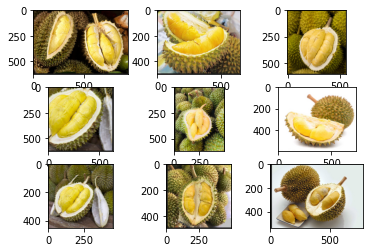

In [23]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/Data-trái-cây/train/saurieng/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'saurieng' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()


In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [6]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [7]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [8]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-trái-cây/train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-trái-cây/validation/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 400 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [10]:
history=model.fit(train_dataset,batch_size=10,epochs=50,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/50
40/40 [==============================] - 49s 1s/step - loss: 1.4948 - accuracy: 0.5100
Epoch 2/50
40/40 [==============================] - 49s 1s/step - loss: 1.3661 - accuracy: 0.5525
Epoch 3/50
40/40 [==============================] - 49s 1s/step - loss: 1.2524 - accuracy: 0.5925
Epoch 4/50
40/40 [==============================] - 48s 1s/step - loss: 1.1650 - accuracy: 0.6050
Epoch 5/50
40/40 [==============================] - 48s 1s/step - loss: 1.2628 - accuracy: 0.5800
Epoch 6/50
40/40 [==============================] - 49s 1s/step - loss: 1.1784 - accuracy: 0.5875
Epoch 7/50
40/40 [==============================] - 49s 1s/step - loss: 1.1126 - accuracy: 0.6300
Epoch 8/50
40/40 [==============================] - 49s 1s/step - loss: 1.0226 - accuracy: 0.6575
Epoch 9/50
40/40 [==============================] - 48s 1s/step - loss: 1.0190 - accuracy: 0.6600
Epoch 10/50
40/40 [==============================] - 48s 1s/step - loss: 0.9907 - accuracy: 0.6625
Epoch 11/50
40/40 [

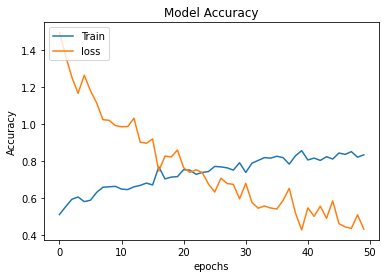

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

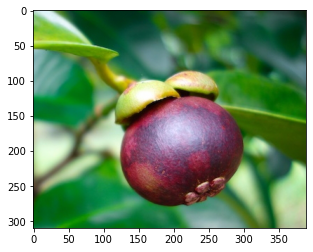

Day la mit


In [13]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-trái-cây/validation/mangcut/mangcut1.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la buoi')
elif kq ==1:
  print('Day la hongxiem')
elif kq ==2:
  print('Day la mangcut')
elif kq ==3:
  print('Day la mit')
elif kq ==4:
  print('Day la quyt')
elif kq ==5:
  print('Day la saurieng')
elif kq ==6:
  print('Day la thanhlong')
elif kq ==7:
  print('Day la vai')
elif kq ==8:
  print('Day la vusua')
elif kq ==9:
  print('Day la xoai')

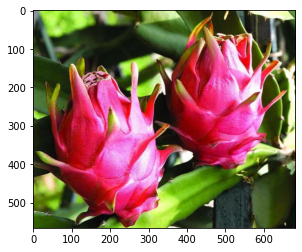

Day la thanhlong


In [14]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-trái-cây/validation/thanhlong/thanglong0.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la buoi')
elif kq ==1:
  print('Day la hongxiem')
elif kq ==2:
  print('Day la mangcut')
elif kq ==3:
  print('Day la mit')
elif kq ==4:
  print('Day la quyt')
elif kq ==5:
  print('Day la saurieng')
elif kq ==6:
  print('Day la thanhlong')
elif kq ==7:
  print('Day la vai')
elif kq ==8:
  print('Day la vusua')
elif kq ==9:
  print('Day la xoai')

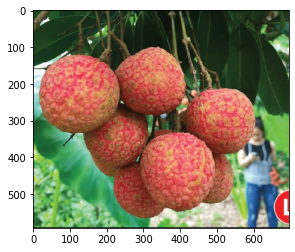

Day la vai


In [20]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-trái-cây/validation/vai/vai1.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la buoi')
elif kq ==1:
  print('Day la hongxiem')
elif kq ==2:
  print('Day la mangcut')
elif kq ==3:
  print('Day la mit')
elif kq ==4:
  print('Day la quyt')
elif kq ==5:
  print('Day la saurieng')
elif kq ==6:
  print('Day la thanhlong')
elif kq ==7:
  print('Day la vai')
elif kq ==8:
  print('Day la vusua')
elif kq ==9:
  print('Day la xoai')